#### Fetal health classification (End-to-end project)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)


In [3]:
data=pd.read_csv('fetal_health.csv')


In [4]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [5]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.shape

(2126, 22)

In [8]:
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

<Axes: >

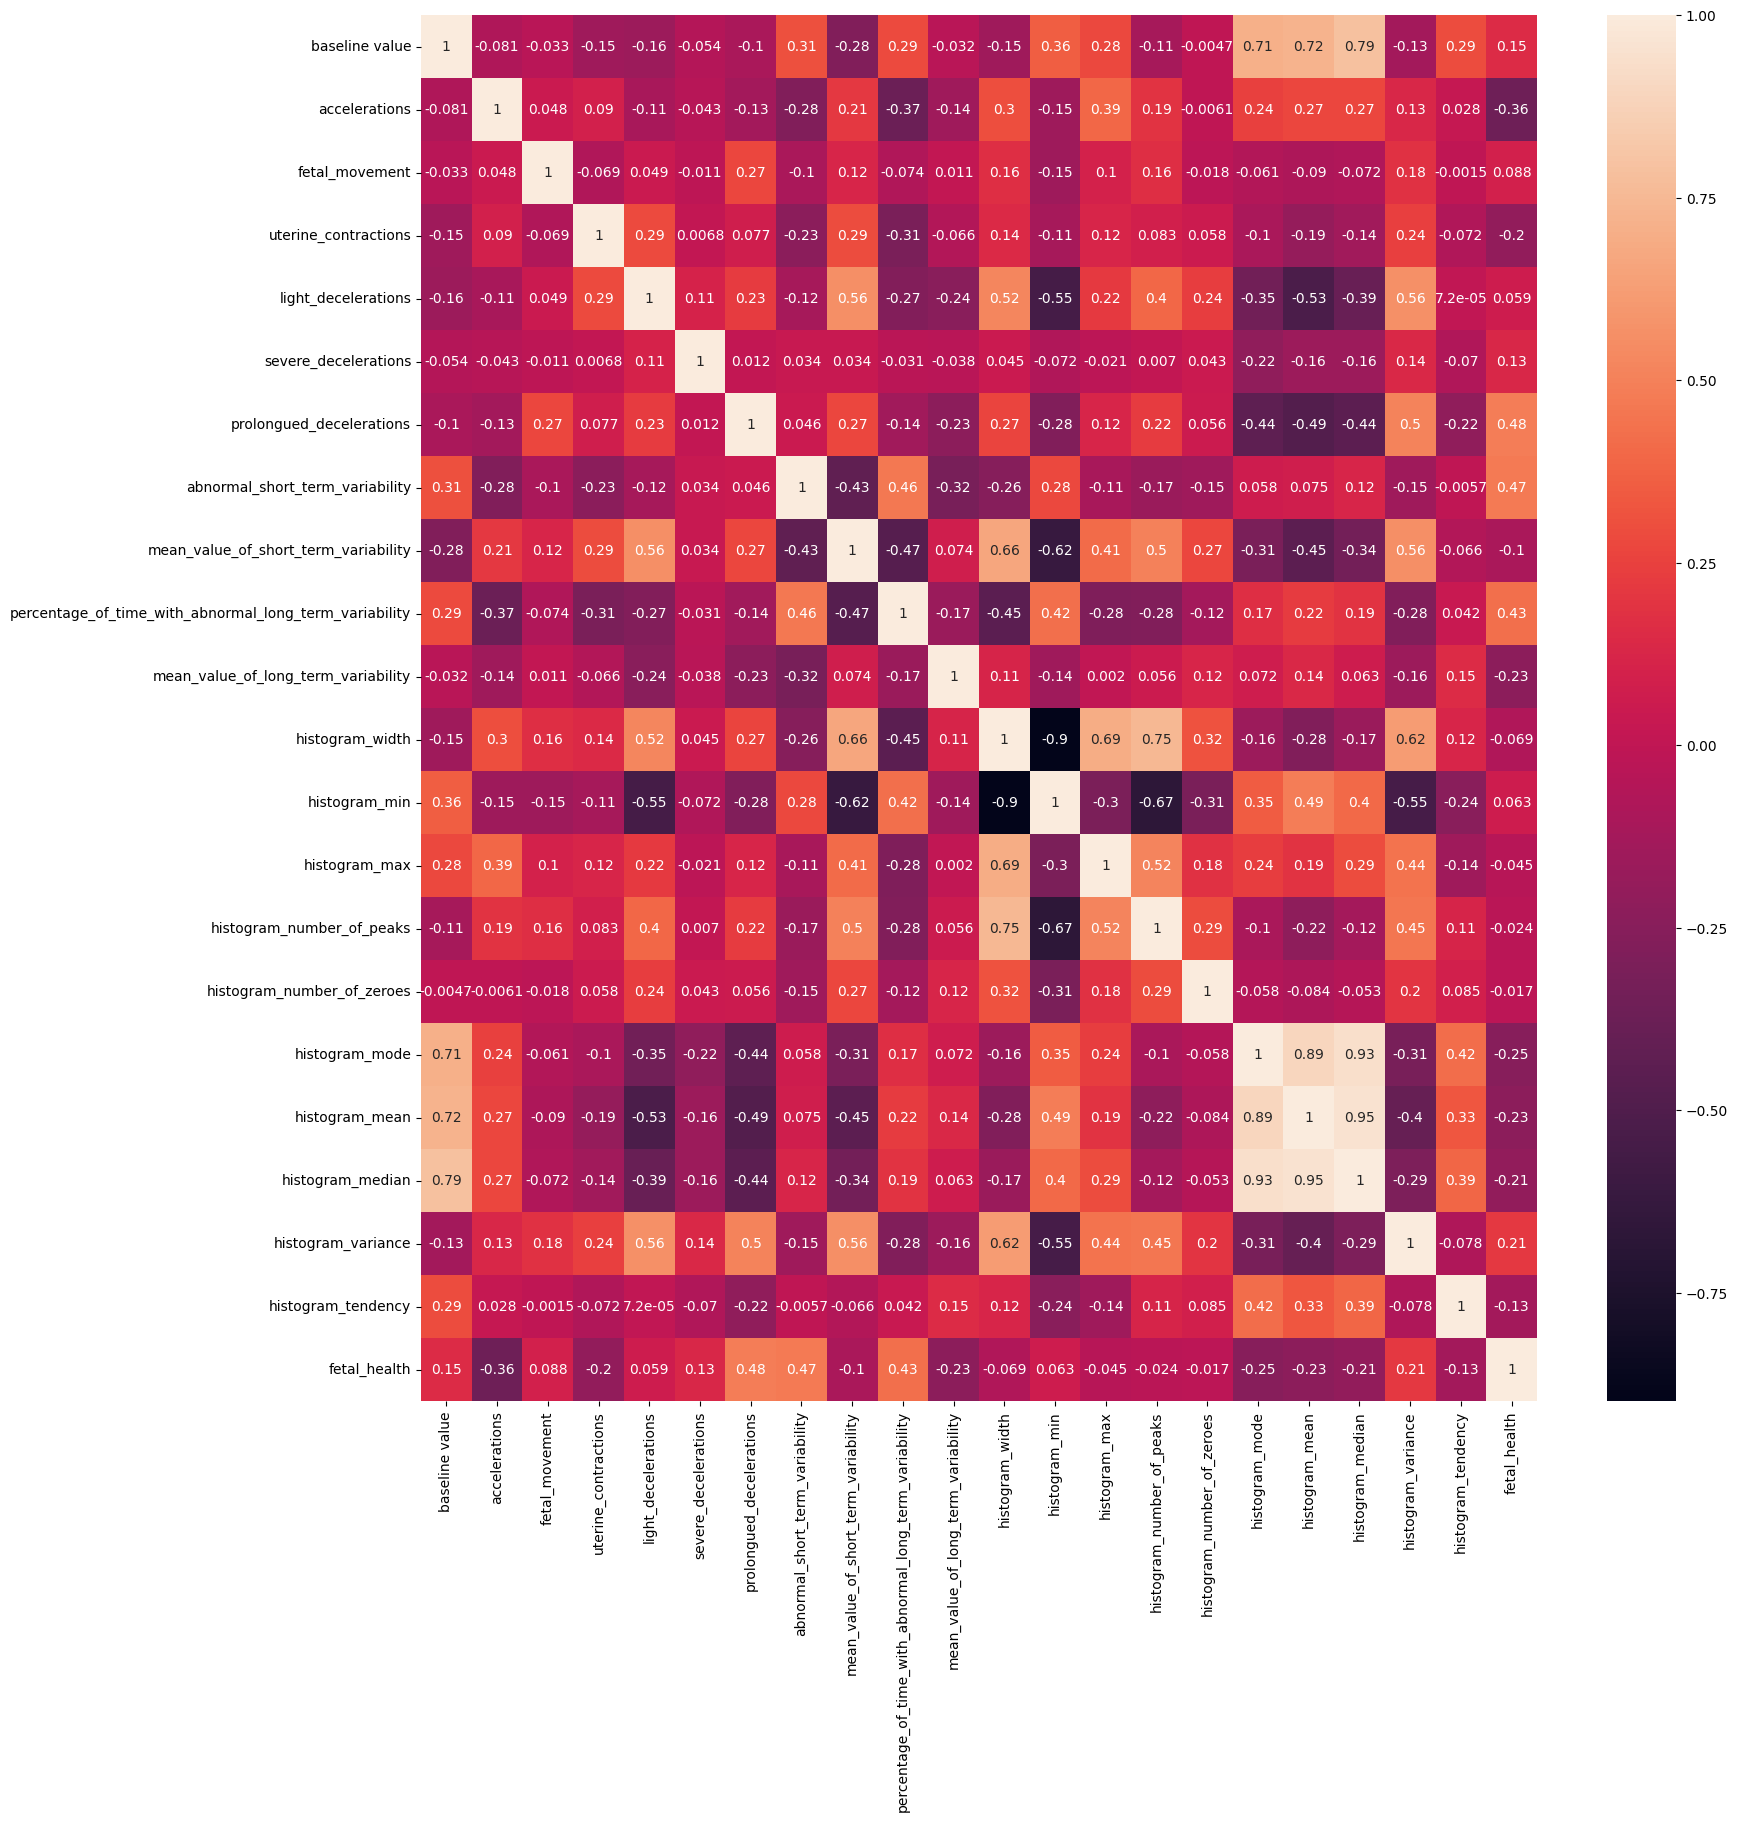

In [9]:
plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(),annot=True)

In [10]:
correlated_features=set()
correlation_matrix=data.corr()

In [11]:
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>0.7:
      colname=correlation_matrix.columns[i]
      correlated_features.add(colname)

In [12]:
print(correlated_features)

{'histogram_median', 'histogram_min', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_mean'}


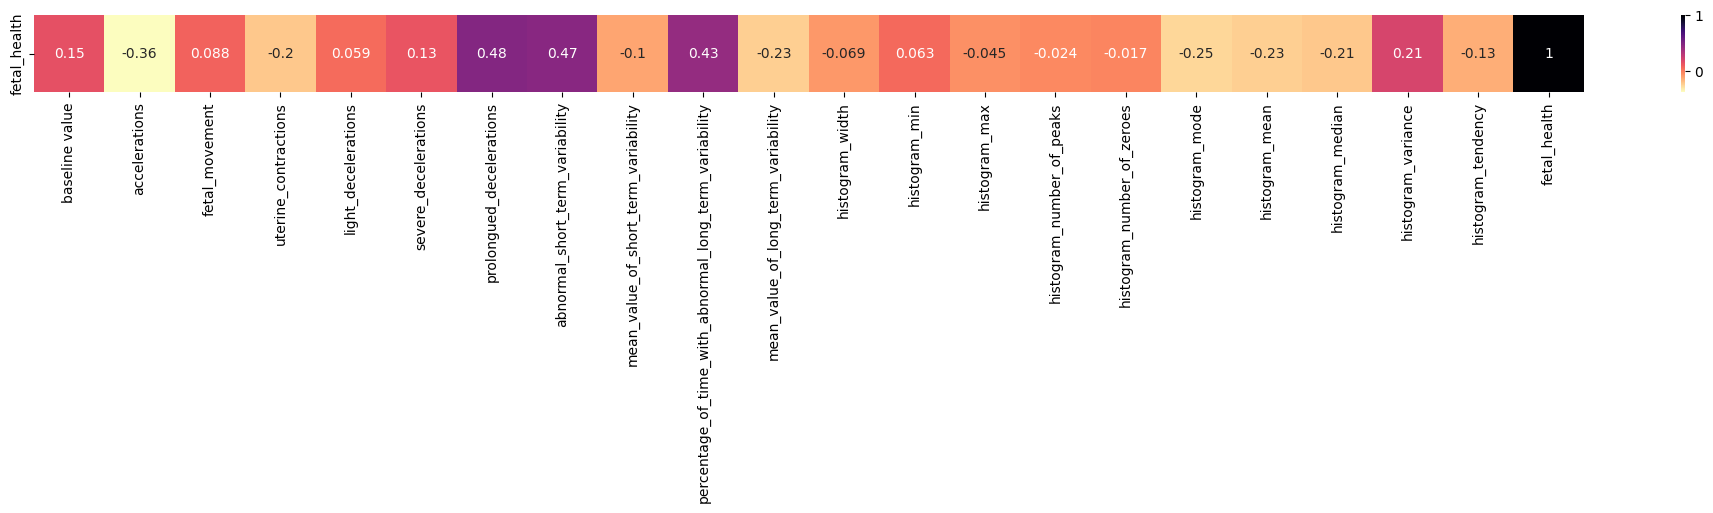

In [13]:
plt.subplots(figsize=(25,1))
sns.heatmap(correlation_matrix.sort_values(by=["fetal_health"], ascending=False).head(1), annot=True, cmap="magma_r")
plt.show()

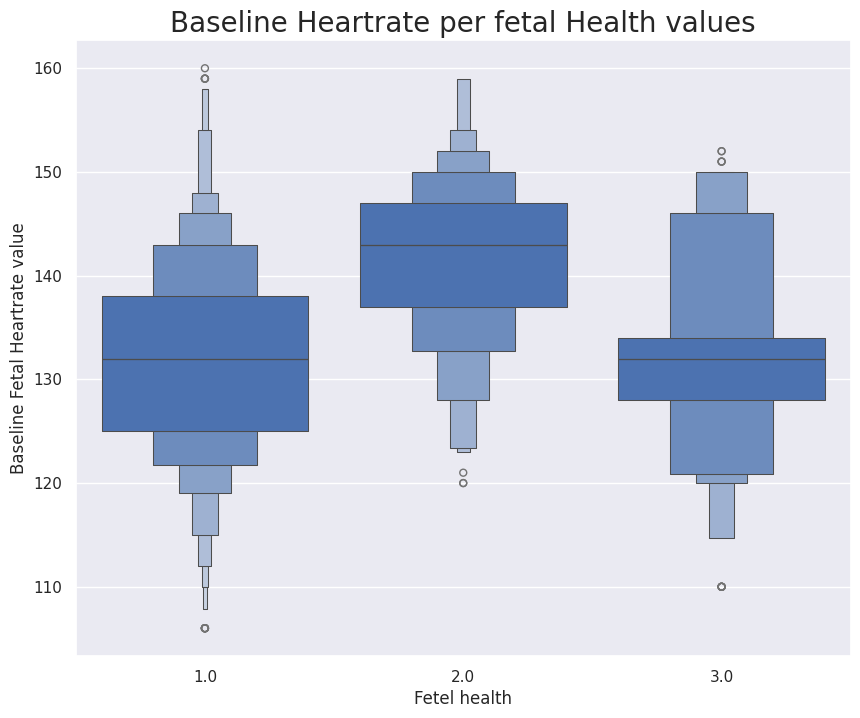

In [14]:
sns.set(font_scale=1)
plt.figure(figsize=(10,8))
g=sns.boxenplot(x='fetal_health', y='baseline value', data=data, saturation=1.5)
g.set_xlabel('Fetel health')
g.set_ylabel('Baseline Fetal Heartrate value')
g.set_title('Baseline Heartrate per fetal Health values', fontsize=20)
plt.show()

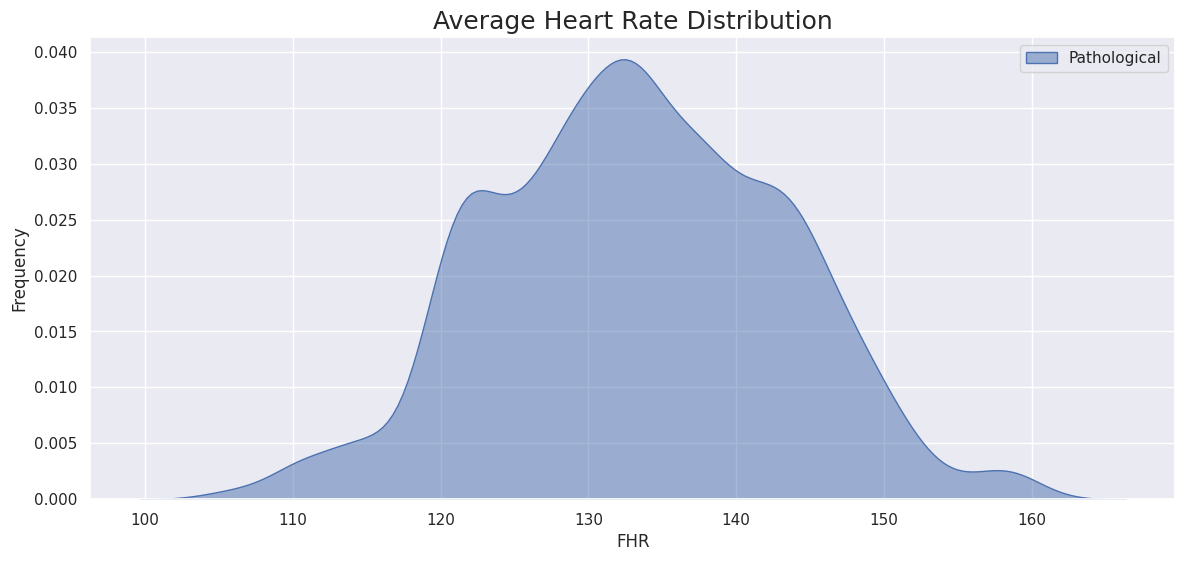

In [15]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data["baseline value"], alpha=0.5,shade = True, ax = ax,palette="coolwarm")
plt.title('Average Heart Rate Distribution', fontsize = 18)
ax.set_xlabel("FHR")
ax.set_ylabel("Frequency")

ax.legend(['Pathological','Suspect','Normal'])

plt.show()

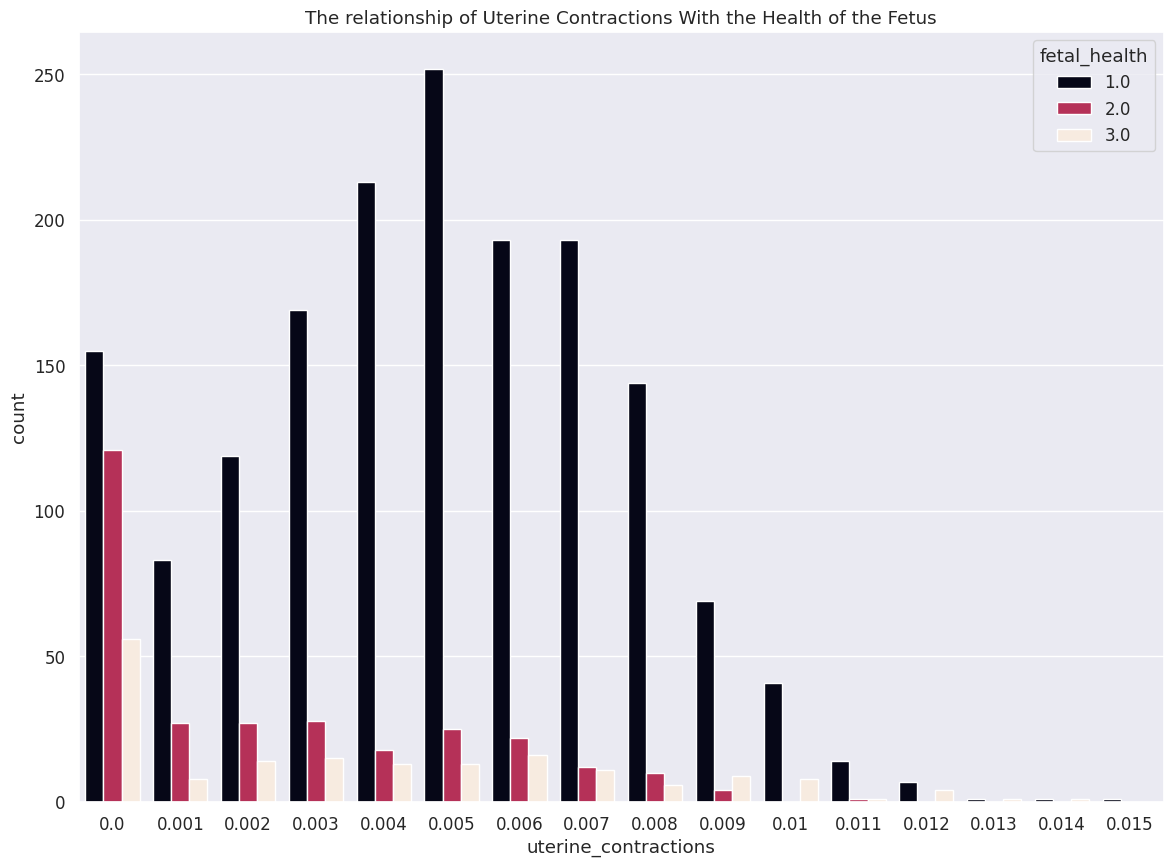

In [16]:
plt.figure(figsize=(14,10))
sns.set_theme(style="darkgrid", font_scale = 1.1)
g =sns.countplot(data=data, x='uterine_contractions', hue='fetal_health', palette='rocket').set_title('The relationship of Uterine Contractions With the Health of the Fetus');

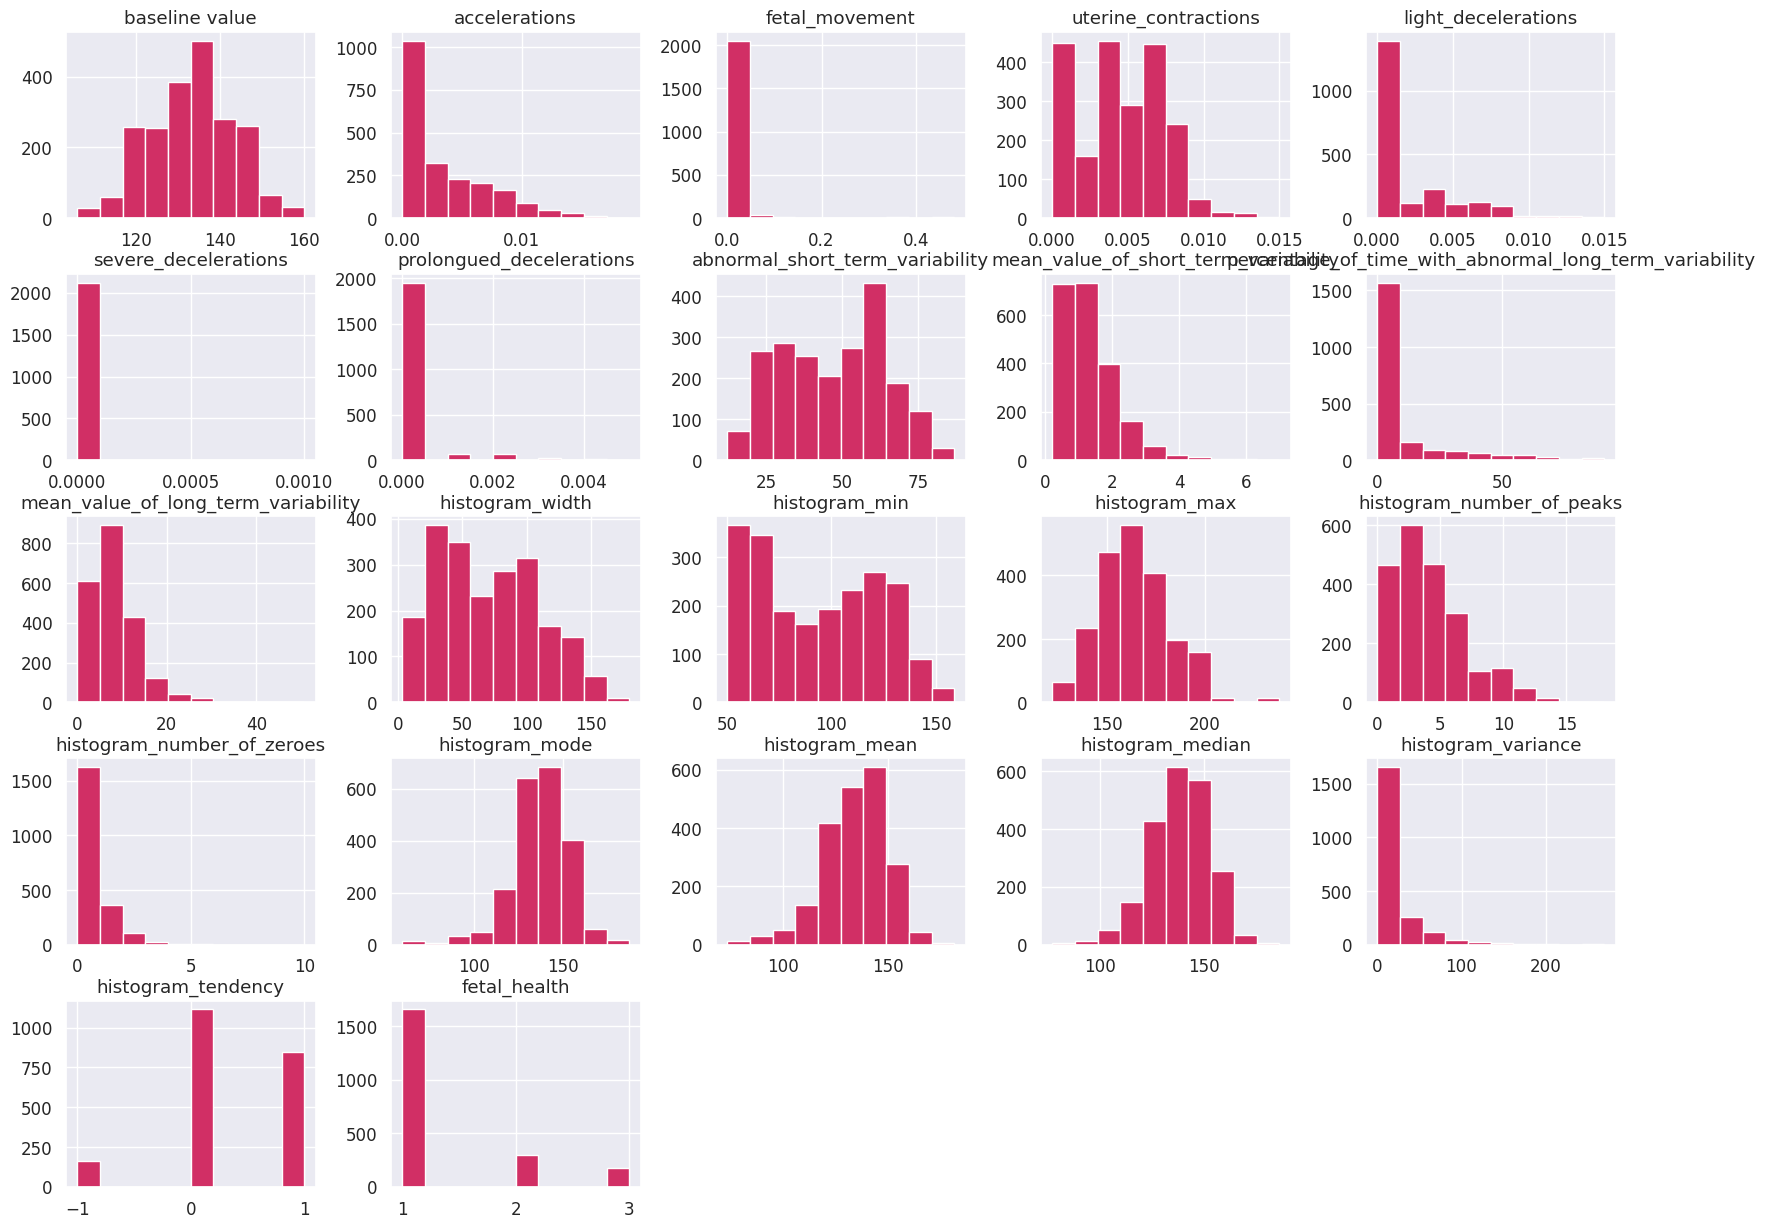

In [17]:
# visualizing all as histogram
data.hist(figsize=(20,15),color='#d12f65')
plt.show()

<Axes: title={'center': 'Data Before sampling'}>

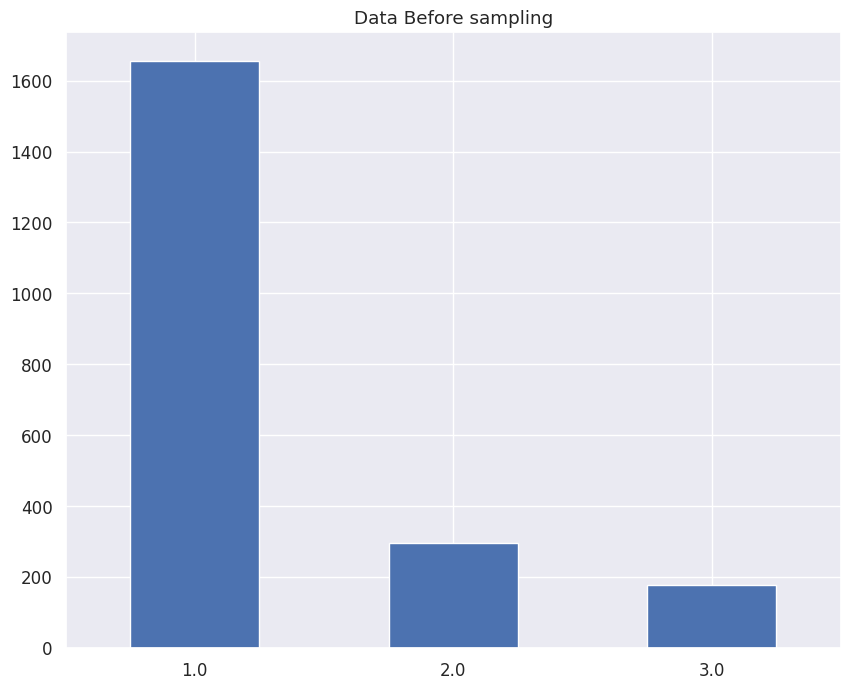

In [18]:
#Before resampling
plt.figure(figsize=(10 ,8 ))
plt.title('Data Before sampling')
data['fetal_health'].value_counts().plot.bar(rot=0)

In [19]:
data_activity_0 = data[data['fetal_health'] == 1.0]
data_activity_else = data[data['fetal_health'] != 1.0]

data_activity_0 = data_activity_0.sample(n=400, random_state=42)
data = pd.concat([data_activity_0, data_activity_else])

<Axes: title={'center': 'Data after sampling'}>

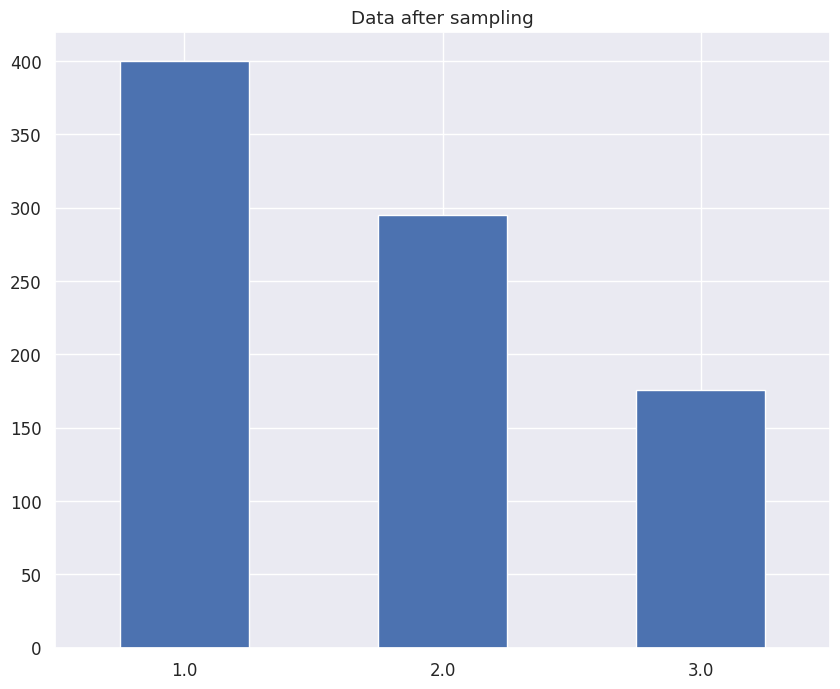

In [20]:
plt.figure(figsize=(10 ,8 ))
plt.title('Data after sampling')
data['fetal_health'].value_counts().plot.bar(rot=0)

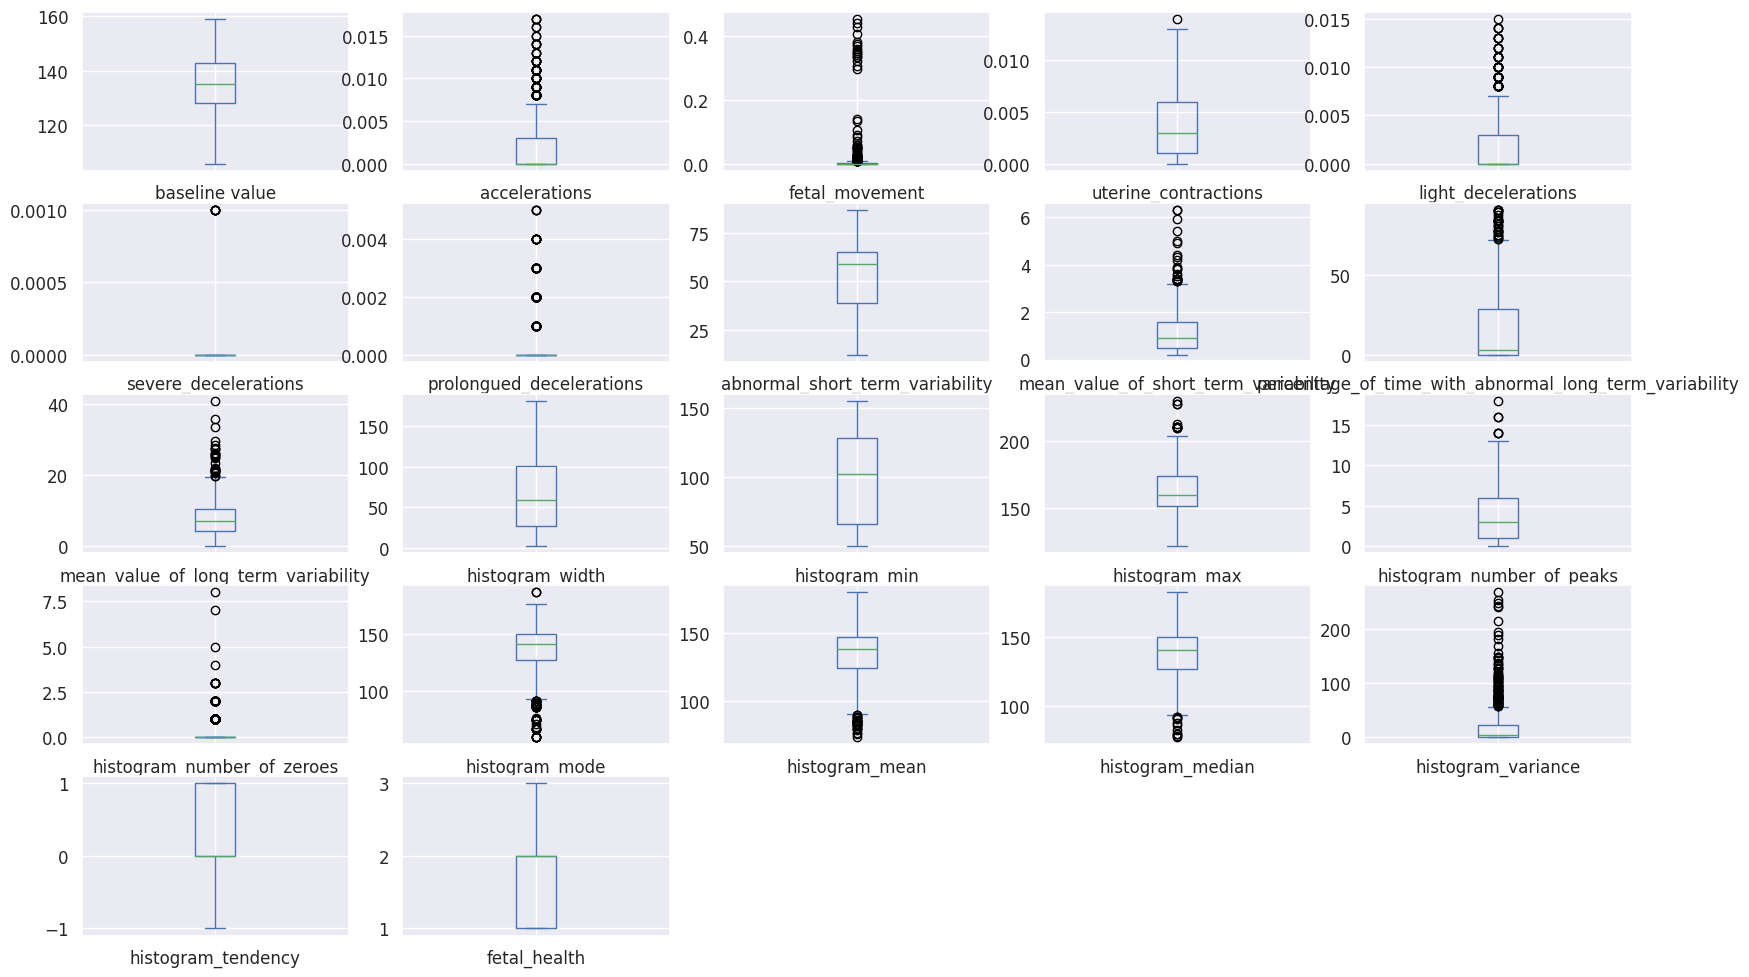

In [21]:
#Checking for outliers
data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

Text(0.5, 1.0, 'Distributions before removing outliers')

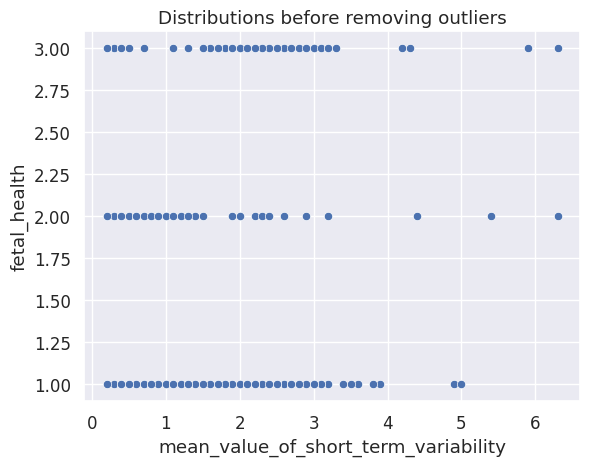

In [22]:

sns.scatterplot(x=data['mean_value_of_short_term_variability'],y=data['fetal_health'])
plt.title('Distributions before removing outliers')

In [23]:
data[data['mean_value_of_short_term_variability']>=4.5].shape

(6, 22)

In [24]:
data=data[data['mean_value_of_short_term_variability']<4.5]

Text(0.5, 1.0, 'Distributions after removing outliers')

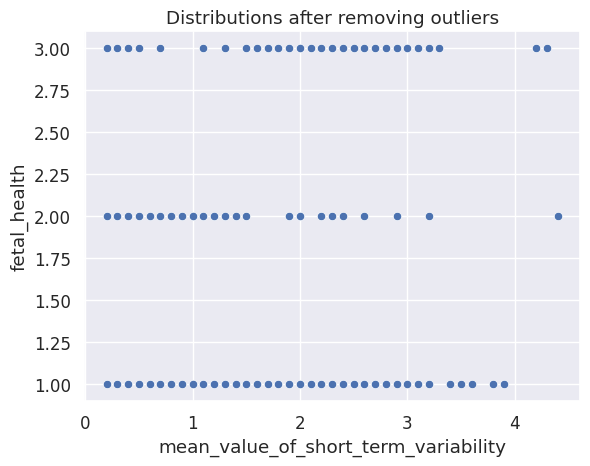

In [25]:
sns.scatterplot(x=data['mean_value_of_short_term_variability'],y=data['fetal_health'])
plt.title('Distributions after removing outliers')

In [26]:
#splitting data
x = data.drop(['fetal_health'], axis=1).values
y = data['fetal_health'].values

In [27]:
# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(692, 21)

In [29]:
x_test.shape

(173, 21)

In [30]:
y_train.shape

(692,)

In [31]:
x_train.shape

(692, 21)

In [32]:
# Scale train/ test predictors based on training data
ro_scaler = RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)

In [33]:
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')


    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))

In [34]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [35]:
lr.score(x_train , y_train)

0.7947976878612717

In [36]:
lr.score(x_test , y_test)

0.8265895953757225

In [37]:
lr2=LogisticRegression()

In [38]:
lr2.fit(x_train_scaled,y_train)

LogisticRegression()

In [39]:
lr2.score(x_train_scaled , y_train)

0.8757225433526011

In [40]:
lr2.score(x_test_scaled , y_test)

0.8497109826589595

In [41]:
y_pred_lr = lr.predict(x_test_scaled)

In [42]:
resultsSummarizer(y_test, y_pred_lr)

Accuracy Score: 47.9769%
Precision Score: 53.9044%
Recall Score: 54.6124%
F_1 Score: 45.9194%
Sensitvity: 54.6124%


In [43]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         1.0       0.92      0.45      0.60        78
         2.0       0.33      0.19      0.24        58
         3.0       0.36      1.00      0.53        37

    accuracy                           0.48       173
   macro avg       0.54      0.55      0.46       173
weighted avg       0.60      0.48      0.47       173



In [44]:

#KNN
k1=KNeighborsClassifier(n_neighbors=4)
k1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [45]:
k1.score(x_train,y_train)

0.8757225433526011

In [46]:
k1.score(x_test,y_test)

0.8034682080924855

In [47]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:10]

,y_Test,y_pred
0,1.0,1.0
1,2.0,2.0
2,2.0,3.0
3,1.0,1.0
4,1.0,1.0
5,1.0,3.0
6,3.0,2.0
7,1.0,1.0
8,2.0,2.0
9,2.0,2.0


In [48]:
k2 = KNeighborsClassifier(n_neighbors=5)
k2.fit(x_train_scaled, y_train)
y_pred_knn = k2.predict(x_test_scaled)

In [49]:
resultsSummarizer(y_test, y_pred_knn)

Accuracy Score: 82.0809%
Precision Score: 82.0228%
Recall Score: 81.9637%
F_1 Score: 81.8580%
Sensitvity: 81.9637%


In [50]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.89      0.82      0.85        78
         2.0       0.74      0.83      0.78        58
         3.0       0.83      0.81      0.82        37

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.83      0.82      0.82       173



In [51]:
#Decision_Tree
dt=DecisionTreeClassifier(max_depth=14)
dt.fit(x_train,y_train)
y_pred_tree = dt.predict(x_test_scaled)

DecisionTreeClassifier(max_depth=14)

In [52]:
dt.score(x_train,y_train)

1.0

In [53]:
dt.score(x_test,y_test)

0.9017341040462428

In [54]:
dt.fit(x_train_scaled, y_train)
y_pred_tree = dt.predict(x_test_scaled)

In [55]:
resultsSummarizer(y_test, y_pred_tree)

Accuracy Score: 89.0173%
Precision Score: 88.7097%
Recall Score: 88.9546%
F_1 Score: 88.8022%
Sensitvity: 88.9546%


In [56]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         1.0       0.93      0.90      0.92        78
         2.0       0.84      0.88      0.86        58
         3.0       0.89      0.89      0.89        37

    accuracy                           0.89       173
   macro avg       0.89      0.89      0.89       173
weighted avg       0.89      0.89      0.89       173



In [57]:
#Random Forest
rf=RandomForestClassifier(max_depth=5)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [58]:
rf.score(x_train,y_train)

0.9176300578034682

In [59]:
rf.score(x_test,y_test)

0.8959537572254336

In [60]:
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(x_train_scaled, y_train)
y_pred_rfst = rfst.predict(x_test_scaled)

In [61]:
resultsSummarizer(y_pred_rfst, y_test)

Accuracy Score: 93.0636%
Precision Score: 92.5355%
Recall Score: 94.0998%
F_1 Score: 93.1807%
Sensitvity: 94.0998%


In [62]:
print(classification_report(y_test, y_pred_rfst))

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94        78
         2.0       0.89      0.95      0.92        58
         3.0       1.00      0.89      0.94        37

    accuracy                           0.93       173
   macro avg       0.94      0.93      0.93       173
weighted avg       0.93      0.93      0.93       173



In [63]:
#Getting best Gamma and C
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)
gridCV.fit(x_train,y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


In [64]:
lin = SVC(kernel='linear',C=best_C,gamma=best_gamma)
lin.fit(x_train, y_train)

SVC(C=0.38, gamma=0.02, kernel='linear')

In [65]:
y_pred_Linear = lin.predict(x_test)
print(classification_report(y_test, y_pred_Linear))

              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86        78
         2.0       0.77      0.71      0.74        58
         3.0       0.76      0.86      0.81        37

    accuracy                           0.81       173
   macro avg       0.80      0.81      0.80       173
weighted avg       0.81      0.81      0.81       173



In [66]:
resultsSummarizer(y_pred_Linear, y_test)

Accuracy Score: 80.9249%
Precision Score: 81.0245%
Recall Score: 79.8155%
F_1 Score: 80.2613%
Sensitvity: 79.8155%


In [67]:

print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

         1.0       0.46      1.00      0.63        78
         2.0       0.75      0.05      0.10        58
         3.0       1.00      0.03      0.05        37

    accuracy                           0.47       173
   macro avg       0.74      0.36      0.26       173
weighted avg       0.67      0.47      0.33       173



In [ ]:
resultsSummarizer(y_test, y_pred_RBF)

Accuracy Score: 47.3988%
Precision Score: 73.8095%
Recall Score: 35.9584%
F_1 Score: 26.1184%
Sensitvity: 35.9584%


In [ ]:
print(classification_report(y_test, y_pred_Poly))

              precision    recall  f1-score   support

         1.0       0.82      0.87      0.84        78
         2.0       0.77      0.71      0.74        58
         3.0       0.78      0.78      0.78        37

    accuracy                           0.80       173
   macro avg       0.79      0.79      0.79       173
weighted avg       0.80      0.80      0.80       173



In [ ]:
resultsSummarizer(y_test, y_pred_Poly)

Accuracy Score: 79.7688%
Precision Score: 79.2215%
Recall Score: 78.7492%
F_1 Score: 78.9081%
Sensitvity: 78.7492%


In [ ]:
#Gaussian NB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred_Gauss = GNB.predict(x_test)

In [ ]:
resultsSummarizer(y_test, y_pred_Gauss)

Accuracy Score: 80.3468%
Precision Score: 78.9284%
Recall Score: 78.9348%
F_1 Score: 78.7065%
Sensitvity: 78.9348%


In [ ]:
#Evaluation of models according to training accuracy
classifier_list = [lr, k2, dt, rf, lin,rbf,poly]
clf_name_list = ['Logistic Regression', 'KNeighborsClassifier', 'Decision Tree', 'Random Forest', 'svc_linear','rbf_svc','poly_svc']

for clf in classifier_list:
    clf.fit(x_train,y_train)

In [ ]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(classifier_list,clf_name_list):
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train, y_train)}')
    print(f'Test Score: {clf.score(x_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print('======================================================')

Using model: Logistic Regression
Trainning Score: 0.7947976878612717
Test Score: 0.8265895953757225
Acc Train: 0.7947976878612717
Acc Test: 0.8265895953757225
Using model: KNeighborsClassifier
Trainning Score: 0.8742774566473989
Test Score: 0.8092485549132948
Acc Train: 0.8742774566473989
Acc Test: 0.8092485549132948
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9017341040462428
Acc Train: 1.0
Acc Test: 0.9017341040462428
Using model: Random Forest
Trainning Score: 0.9161849710982659
Test Score: 0.9017341040462428
Acc Train: 0.9161849710982659
Acc Test: 0.9017341040462428
Using model: svc_linear
Trainning Score: 0.8569364161849711
Test Score: 0.8092485549132948
Acc Train: 0.8569364161849711
Acc Test: 0.8092485549132948
Using model: rbf_svc
Trainning Score: 1.0
Test Score: 0.47398843930635837
Acc Train: 1.0
Acc Test: 0.47398843930635837
Using model: poly_svc
Trainning Score: 0.8251445086705202
Test Score: 0.7976878612716763
Acc Train: 0.8251445086705202
Acc Test: 0.79768

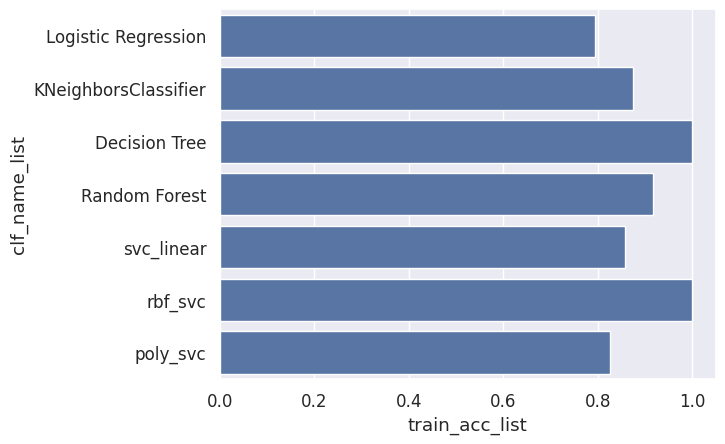

In [ ]:
clf_name_list = np.array([clf_name_list]).reshape(7,1)
train_acc_list = np.array([train_acc_list]).reshape(7,1)
df = pd.DataFrame(clf_name_list,columns=["clf_name_list"])
df["train_acc_list"] = train_acc_list
sns.barplot(data=df,y="clf_name_list",x="train_acc_list");

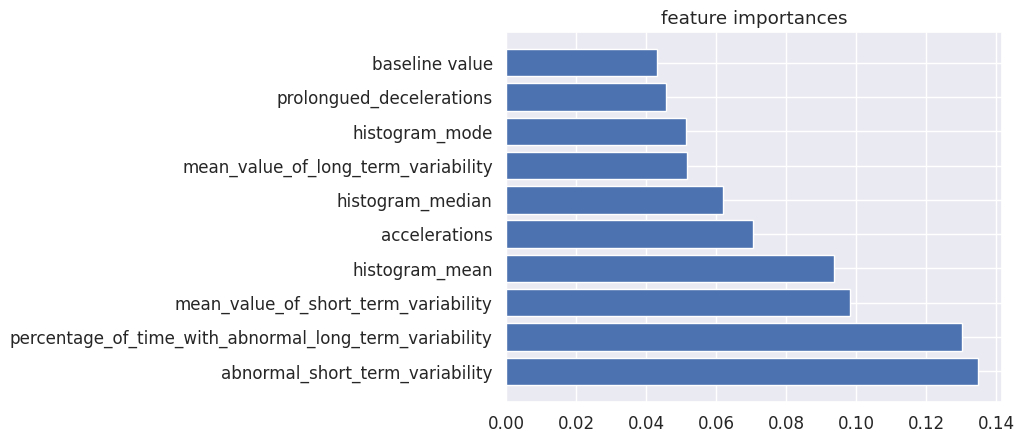

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(x_train,y_train)
f_importances(abs(rfst.feature_importances_), features_names, top=10)